[*********************100%***********************]  1 of 1 completed


Strategy Return: 5.95249
Outperformance: 2.58929
Annualized Volatility: 0.1876


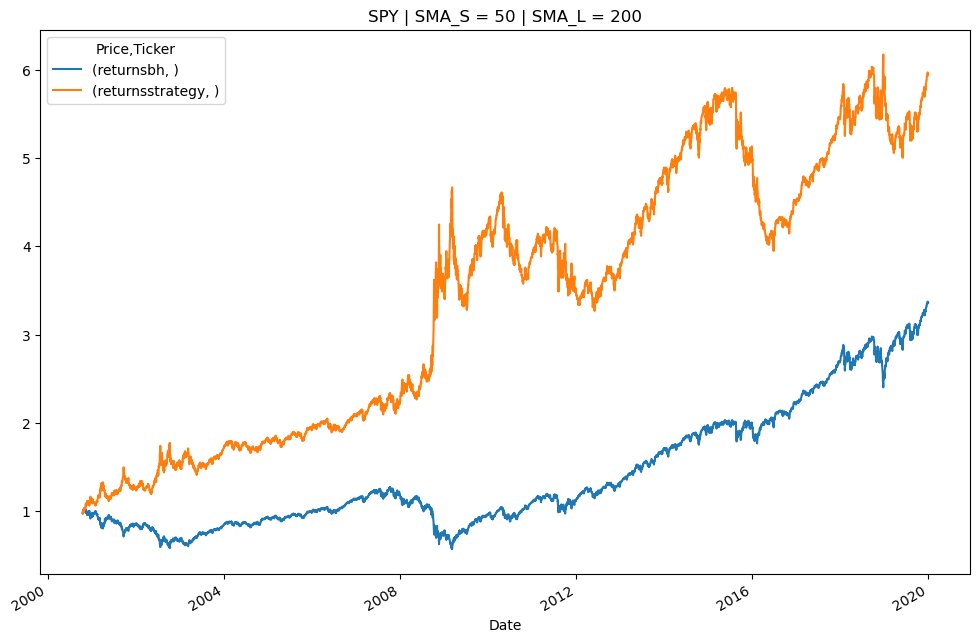

In [23]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()

    def get_data(self):
        df = yf.download(self.symbol, start=self.start, end=self.end, auto_adjust=True)
        data = df[["Close"]].copy()
        data["returns"] = np.log(data["Close"] / data["Close"].shift(1))
        data["SMA_S"] = data["Close"].rolling(self.SMA_S).mean()
        data["SMA_L"] = data["Close"].rolling(self.SMA_L).mean()
        data.dropna(inplace=True)
        self.data2 = data
        return data

    def test_results(self):
        data = self.data2.copy()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1,-1)
        data["strategy"] = data["returns"] * data["position"].shift(1)
        data.dropna(inplace=True)
        data["returnsbh"] = data["returns"].cumsum().apply(np.exp)
        data["returnsstrategy"] = data["strategy"].cumsum().apply(np.exp)

        self.results = data

        # Final strategy return
        perf = data["returnsstrategy"].iloc[-1]
        # Outperformance vs buy-and-hold
        outperf = perf - data["returnsbh"].iloc[-1]
        # Annualized volatility
        std = data["strategy"].std() * np.sqrt(252)

        return round(perf, 6), round(outperf, 6), round(std, 4)

    def plot_results(self):
        if self.results is None:
            print("Run the test_results() method first.")
        else:
            title = f"{self.symbol} | SMA_S = {self.SMA_S} | SMA_L = {self.SMA_L}"
            self.results[["returnsbh", "returnsstrategy"]].plot(title=title, figsize=(12, 8))
            plt.show()

# Create an instance (AFTER full class is defined)
tester = SMABacktester("SPY", 50, 200, "2000-01-01", "2020-01-01")

# Run backtest
perf, outperf, std = tester.test_results()
print(f"Strategy Return: {perf}")
print(f"Outperformance: {outperf}")
print(f"Annualized Volatility: {std}")

# Plot results
tester.plot_results() 

[*********************100%***********************]  1 of 1 completed


Strategy Return: 7.001181
Outperformance: 3.637981
Annualized Volatility: 0.1876


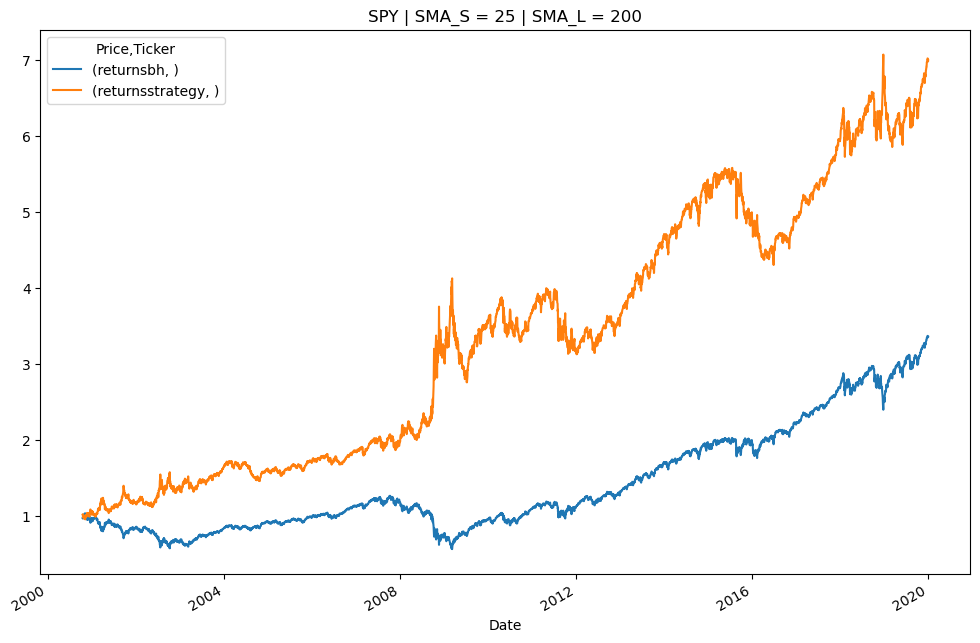

In [42]:
tester = SMABacktester("SPY", 25, 200, "2000-01-01", "2020-01-01")

#  Run backtest
perf, outperf, std = tester.test_results()
print(f"Strategy Return: {perf}")
print(f"Outperformance: {outperf}")
print(f"Annualized Volatility: {std}")

#  Plot results
tester.plot_results() 

[*********************100%***********************]  1 of 1 completed


Strategy Return: 6.727271
Outperformance: 3.364071
Annualized Volatility: 0.1876


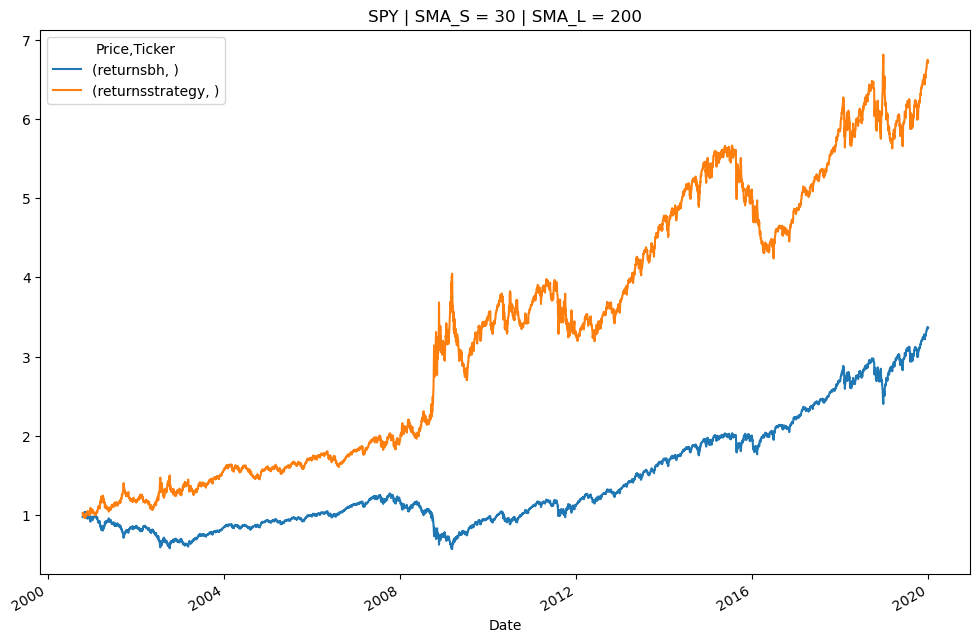

In [43]:
tester = SMABacktester("SPY", 30, 200, "2000-01-01", "2020-01-01")

#  Run backtest
perf, outperf, std = tester.test_results()
print(f"Strategy Return: {perf}")
print(f"Outperformance: {outperf}")
print(f"Annualized Volatility: {std}")

#  Plot results
tester.plot_results() 